### generate_graph_from_triples.py
### def call_main_GRAPH(f1, f2, f4, f5, f6, f7, gdict, prune, verbose, gt1, NE_types, config):
    q_ent, cornerstones, QKG_match_flag = call_main_GRAPH(spo_file, con, terms, f2, QKG_file, cornerstone_file,gdict,prune,verbose,gt,NE_types,config)
    
    spo_file = './files/SPO_paragraph_ques-q1.txt'
    
    con = './files/context_ques-q1'
    
    terms = 'question_subject_predicate.txt'
    
    f2 = 'mention_dict_all_docs'
    
    QKG_file = './files/QKG_ques-q1'
    
    cornerstone_file = './files/QKG_cornerstones_ques-q1'
    
    gdict = <gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x11bf1fa10>
    
    prune = 5
    
    verbose = 0
    
    gt = <type 'set'>: set(['unknown'])
    
    NE_types = list[]
    
    config = <type 'dict'>: {'Embedding_Similarity': '1', 'Wikitype': '0', 'verbose': '0', 'SPO_option': '1', 'Cornerstone_Matching': '0', 'Cosine_threshold': '0.75', 'Type_Alignment': '0', 'context_length': '10', 'corpus': 'question_top10.txt', 'Jaccard_threshold': '0.25', 'ans_type': 'question_type.txt', 'Distribute_Node_wt': '0', 'Wiki_Threshold': '0.25', 'benchmark': 'none', 'error_file': './results/errors/Error_Analysis_flags', 'outfile': 'answer.txt', 'result_file': './results/Answer', 'prune': '5', 'n_GST': '50', 'mention_dict': 'mention_dict_all_docs', 'Type_Filtering': '0', 'corpora': 'top10', 'chain_join_flag': '1', 'embedding': 'WORD2VEC', 'ques_ent_pred': 'question_subject_predicate.txt'}

In [1]:
import gensim
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from stanfordcorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP(r'stanford-corenlp-full-2018-10-05')

In [2]:
import networkx as nx
import sys
import matplotlib.pyplot as plt
import math
import numpy as np
import hearstPatterns
import nltk
import pickle
import requests
import json

In [4]:
from hearstPatterns import HearstPatterns
from nltk.corpus import stopwords

In [5]:
sw = stopwords.words("english")
# verbose = 0
# threshold = 0.75
# threshold2 = 0.5
# MAX_MATCH = 1

aux_list = set(
    ['be', 'am', 'being', 'been', 'is', 'are', 'was', 'were', 'has', 'have', 'had', 'having', 'do', 'does', 'did',
     'done', 'will', 'would', 'shall', 'should', 'can', 'could', 'dare', 'may', 'might', 'must', 'need', 'ought'])

stop_list = set(
    ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'aren\'t', 'as', 'at',
     'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can\'t', 'cannot', 'could',
     'couldn\'t', 'did', 'didn\'t', 'do', 'does', 'doesn\'t', 'doing', 'don\'t', 'down', 'during', 'each', 'few', 'for',
     'from', 'further', 'had', 'hadn\'t', 'has', 'hasn\'t', 'have', 'haven\'t', 'having', 'he', 'he\'d', 'he\'ll',
     'he\'s', 'her', 'here', 'here\'s', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'how\'s', 'i', 'i\'d',
     'i\'ll', 'i\'m', 'i\'ve', 'if', 'in', 'into', 'is', 'isn\'t', 'it', 'it\'s', 'its', 'itself', 'let\'s', 'me',
     'more', 'most', 'mustn\'t', 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other',
     'ought', 'our', 'ours	ourselves', 'out', 'over', 'own', 'same', 'shan\'t', 'she', 'she\'d', 'she\'ll', 'she\'s',
     'should', 'shouldn\'t', 'so', 'some', 'such', 'than', 'that', 'that\'s', 'the', 'their', 'theirs', 'them',
     'themselves', 'then', 'there', 'there\'s', 'these', 'they', 'they\'d', 'they\'ll', 'they\'re', 'they\'ve', 'this',
     'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', 'wasn\'t', 'we', 'we\'d', 'we\'ll',
     'we\'re', 'we\'ve', 'were', 'weren\'t', 'what', 'what\'s', 'when', 'when\'s', 'where', 'where\'s', 'which',
     'while', 'who', 'who\'s', 'whom', 'why', 'why\'s', 'with', 'won\'t', 'would', 'wouldn\'t', 'you', 'you\'d',
     'you\'ll', 'you\'re', 'you\'ve', 'your', 'yours', 'yourself', 'yourselves'])


def round(v, k):  # overwriting round to get edges of different weight
    return v


def visualize_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=500)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)

    edge_labels = dict([((u, v,), d['weight'])
                        for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.show()

In [6]:
#parameter gdict 
#!!!cost a lot of time 
gdict={}
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)  
word_vectors = model.wv
gdict=word_vectors
#“GoogleNews-vectors-negative300.bin.gz” what it is？

/usr/local/anaconda3/envs/QUES_Test/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [6]:
gdict

In [10]:
#other parameter
# spo_file = './files/SPO_paragraph_ques-q1.txt'

# con = './files/context_ques-q1'

# terms = 'question_subject_predicate.txt'

# f2 = 'mention_dict_all_docs'

# QKG_file = './files/QKG_ques-q1'

# cornerstone_file = './files/QKG_cornerstones_ques-q1'

# # gdict = <gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x11bf1fa10>

# prune = 5

# verbose = 0

# gt = set(['unknown'])

# NE_types = list()

# config = {'Embedding_Similarity': '1', 'Wikitype': '0', 'verbose': '0', 'SPO_option': '1', 'Cornerstone_Matching': '0', 'Cosine_threshold': '0.75', 'Type_Alignment': '0', 'context_length': '10', 'corpus': 'question_top10.txt', 'Jaccard_threshold': '0.25', 'ans_type': 'question_type.txt', 'Distribute_Node_wt': '0', 'Wiki_Threshold': '0.25', 'benchmark': 'none', 'error_file': './results/errors/Error_Analysis_flags', 'outfile': 'answer.txt', 'result_file': './results/Answer', 'prune': '5', 'n_GST': '50', 'mention_dict': 'mention_dict_all_docs', 'Type_Filtering': '0', 'corpora': 'top10', 'chain_join_flag': '1', 'embedding': 'WORD2VEC', 'ques_ent_pred': 'question_subject_predicate.txt'}

In [9]:
f1 = './files/SPO_paragraph_ques-q1.txt' #spo_file

f2 = './files/context_ques-q1' #context

f4 = 'question_subject_predicate.txt' #terms

f5 = 'mention_dict_all_docs' #mention_dict

f6 = './files/QKG_ques-q1' #QKG file

f7 ='./files/QKG_cornerstones_ques-q1' #QKG cornerstones 

# gdict = 
# prune, verbose, 
gt1 = set(['unknown'])
# , NE_types, config)
prune = 5

verbose = 0

gt = set(['unknown'])

NE_types = list()

config = {'Embedding_Similarity': '1', 'Wikitype': '0', 'verbose': '0', 'SPO_option': '1', 'Cornerstone_Matching': '0', 'Cosine_threshold': '0.75', 'Type_Alignment': '0', 'context_length': '10', 'corpus': 'question_top10.txt', 'Jaccard_threshold': '0.25', 'ans_type': 'question_type.txt', 'Distribute_Node_wt': '0', 'Wiki_Threshold': '0.25', 'benchmark': 'none', 'error_file': './results/errors/Error_Analysis_flags', 'outfile': 'answer.txt', 'result_file': './results/Answer', 'prune': '5', 'n_GST': '50', 'mention_dict': 'mention_dict_all_docs', 'Type_Filtering': '0', 'corpora': 'top10', 'chain_join_flag': '1', 'embedding': 'WORD2VEC', 'ques_ent_pred': 'question_subject_predicate.txt'}

In [10]:
threshold = float(config['Cosine_threshold'])
threshold2 = float(config['Jaccard_threshold'])
MAX_MATCH = int(config['Embedding_Similarity'])

In [11]:
threshold

0.75

In [12]:
config['Cosine_threshold']

'0.75'

In [13]:
if verbose:
    print "At call main graph ", threshold, threshold2, MAX_MATCH

Wikitype_flag = int(config['Wikitype'])
Wiki_Threshold = float(config['Wiki_Threshold'])

Type_Alignment_flag = int(config['Type_Alignment'])
Distribute_Node_wt_flag = int(config['Distribute_Node_wt'])

Cornerstone_Matching = int(config['Cornerstone_Matching'])
f11 = open(f1, 'r')
f22 = open(f2, 'r')
# f33=open(f3,'r')
f44 = open(f4, 'r')
mention_dict = pickle.load(open(f5, 'r'))

In [98]:
mention_dict

{'roy disney': {'<roy_e._disney>', '<roy_o._disney>'},
 'toy story 3': {'<toy_story_3>'},
 'four': {'<1901_louisiana_hurricane>',
  '<1909_velasco_hurricane>',
  '<1932_bahamas_hurricane>',
  '<1940_new_england_hurricane>',
  '<1947_fort_lauderdale_hurricane>',
  '<4>',
  '<4_(beyonc\xc3\xa9_album)>',
  '<4_(dungen_album)>',
  '<4_(foreigner_album)>',
  '<4_(galliano_album)>',
  '<4_(gerling_album)>',
  '<4_(hunter_ep)>',
  '<4_(johan_album)>',
  '<4_(kumbia_kings_album)>',
  '<4_(matisse_album)>',
  '<4_(new_york_city_subway_service)>',
  '<4_(the_red_jumpsuit_apparatus_album)>',
  '<4_(whigfield_album)>',
  '<4_world_trade_center>',
  "<australia's_got_talent_(season_4)>",
  '<big_four_(band)>',
  '<big_four_(central_pacific_railroad)>',
  '<big_four_(debutantes)>',
  '<big_four_(najaf)>',
  '<boundary_(cricket)>',
  '<brunswick_four>',
  '<butare_four>',
  '<channel_4>',
  '<christopher_shinn>',
  '<coventry_four>',
  '<de/belnaps_vierwertige_logik>',
  '<de/four>',
  '<de/four_(fra

In [95]:
#test
f11

<open file './files/SPO_paragraph_ques-q1.txt', mode 'r' at 0x257f1f810>

In [14]:
# Read entities of question
q_ent = set()
type_qent = {}
for line in f44:
    line = line.strip()
    line = line.split()
    s = line[0]
    for i in range(1, len(line) - 1):
        s += ' ' + line[i]
    q_ent.add(s.lower())
    type_qent[s.lower()] = line[len(line) - 1]
if verbose:
    print "Query terms ->", len(q_ent), q_ent
if len(q_ent) > prune:
    if verbose:
        print "Pruning.."
    p = frozenset(q_ent)
    for s in p:
        if type_qent[s] == 'P':
            q_ent.remove(s)

if verbose:
    print "Without Predicate Query terms ->", len(q_ent), q_ent

p = frozenset(q_ent)
for s in p:
    if s in aux_list and type_qent[s] == 'P':
        q_ent.remove(s)

if verbose:
    print "Without Auxiliary Query terms ->", len(q_ent), q_ent


In [15]:
line

['born', 'P']

In [16]:
q_ent

{'born', 'steve jobs'}

In [17]:
type_qent

{'born': 'P', 'steve jobs': 'NE', 'was': 'P'}

In [18]:
unique_SPO_dict = {}
for line in f11:
    # sent[s_id][0]+' | '+sent[s_id][1]+' | '+sent[s_id][2]+' | '+s.encode('utf-8')+' | '+str(d1)+' | '+p.encode('utf-8')+' | '+str(d2)+' | '+o.encode('utf-8')
    # if verbose:
    #	print line

    # l=line.strip().split(' | ')
    triple = line.strip().split(' | ')
    # triple_list.append((l[0],l[1],l[2],l[3],l[4],l[5],l[6],l[7]))

    doc_id = triple[0]
    doc_title = triple[1]
    sent_id = triple[2]
    n1 = triple[3].decode('utf-8')
    d1 = float(triple[4])
    n2 = triple[5].decode('utf-8')
    d2 = float(triple[6])
    n3 = triple[7].decode('utf-8')

    if (n1, n2, n3) not in unique_SPO_dict:
        unique_SPO_dict[(n1, n2, n3)] = {}
        unique_SPO_dict[(n1, n2, n3)]['d1'] = []
        unique_SPO_dict[(n1, n2, n3)]['d2'] = []
        unique_SPO_dict[(n1, n2, n3)]['doc_id'] = []
        unique_SPO_dict[(n1, n2, n3)]['doc_title'] = []
        unique_SPO_dict[(n1, n2, n3)]['sent_id'] = []

    unique_SPO_dict[(n1, n2, n3)]['d1'].append(d1)
    unique_SPO_dict[(n1, n2, n3)]['d2'].append(d2)
    unique_SPO_dict[(n1, n2, n3)]['doc_id'].append(doc_id)
    unique_SPO_dict[(n1, n2, n3)]['doc_title'].append(doc_title)
    unique_SPO_dict[(n1, n2, n3)]['sent_id'].append((sent_id, doc_id))


In [19]:
triple

['doc-9',
 './docs/doc10.txt',
 'sent-66',
 'main link-v-med-2 emma form compo pop',
 '2',
 'go',
 '2',
 'quantcast buysellads amazon links world version cheetah']

In [24]:
unique_SPO_dict

{(u'December 1996', u'was', u'company'): {'d1': [3.0],
  'd2': [4.0],
  'doc_id': ['doc-4'],
  'doc_title': ['./docs/doc5.txt'],
  'sent_id': [('sent-124', 'doc-4')]},
 (u'Steve Jobs', u'came', u'name'): {'d1': [2.0],
  'd2': [4.0],
  'doc_id': ['doc-4'],
  'doc_title': ['./docs/doc5.txt'],
  'sent_id': [('sent-51', 'doc-4')]},
 (u'Steve', u'keynote speech at', u'Macworld Conference'): {'d1': [1.0],
  'd2': [2.0],
  'doc_id': ['doc-0'],
  'doc_title': ['./docs/doc1.txt'],
  'sent_id': [('sent-416', 'doc-0')]},
 (u'room', u'put', u'floor'): {'d1': [2.0],
  'd2': [4.0],
  'doc_id': ['doc-7'],
  'doc_title': ['./docs/doc8.txt'],
  'sent_id': [('sent-285', 'doc-7')]},
 (u'Walter 2011',
  u'Visionary Redefined Digital Age The New York Times Isaacson',
  u'Apple'): {'d1': [1.0],
  'd2': [1.0],
  'doc_id': ['doc-0'],
  'doc_title': ['./docs/doc1.txt'],
  'sent_id': [('sent-595', 'doc-0')]},
 (u'Steve Jobs', u'met as', u'University of Wisconsin'): {'d1': [2.0],
  'd2': [4.0],
  'doc_id': ['doc

### Adding SPO triple edges

#### 0-Question vectors and node vectors are built inside

##### 0.1-parameter:
    G = build_graph_from_triple_edges(unique_SPO_dict, q_ent, type_qent, gdict, mention_dict, Cornerstone_Matching)
    
    unique_SPO_dict, 
    
    q_ent, question entities
    
    type_qent, question entity type
    
    gdict, 
            model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)  
            word_vectors = model.wv
            gdict=word_vectors
    
    mention_dict, 
    
    Cornerstone_Matching

##### 0.2-function

In [ ]:
def build_graph_from_triple_edges(unique_SPO_dict, q_ent, type_qent, gdict, mention_dict, Cornerstone_Matching):
    G = nx.DiGraph()
    c = 0
    pred_count = {}
    spo_wt = {}

    veclen = 300
    g_ques = {}
    done = set()

    for n in q_ent:
        if n not in done:
            done.add(n)
            nw1 = n.replace('-', ' ').split()
            avec = np.zeros(veclen)
            c = 0.0
            for el in nw1:
                if el in gdict and el.lower() not in stop_list:
                    # if option=='GLOVE':
                    #	avec=np.add(avec,gdict[el])
                    # else:
                    avec = np.add(avec, np.array(gdict[el]))
                    c += 1.0
            if c > 0:
                avec = np.divide(avec, c)
                g_ques[n] = avec.tolist()

    if verbose:
        print "Unique SPOs cornerstones ", len(unique_SPO_dict), threshold2, MAX_MATCH, threshold

    for (nn1, nn2, nn3) in unique_SPO_dict:
        doc_id = unique_SPO_dict[(nn1, nn2, nn3)]['doc_id']
        doc_title = unique_SPO_dict[(nn1, nn2, nn3)]['doc_title']
        sent_id = unique_SPO_dict[(nn1, nn2, nn3)]['sent_id']
        d1 = unique_SPO_dict[(nn1, nn2, nn3)]['d1']
        d2 = unique_SPO_dict[(nn1, nn2, nn3)]['d2']

        n1 = nn1.lower()
        n2 = nn2.lower()
        n3 = nn3.lower()

        n11 = n1.lower() + ":Entity"
        n22 = n2.lower() + ":Predicate"
        n33 = n3.lower() + ":Entity"

        # Check if triple contains auxiliary verb or blank or single letter predicate, then remove it
        if n2 in aux_list or n2 == '' or len(n2) == 1:
            continue

        # Checking if n1 is cornerstone
        max_val = 0.0
        max_word = ""

        if n1.lower() in q_ent and (
                type_qent[n1.lower()] == 'S' or type_qent[n1.lower()] == 'NE' or Cornerstone_Matching == 0):
            max_val = 1.0
            max_word = n1.lower()
        # if n1.lower()=='george lopez':
        #	print "max match n1 top", max_val, max_word
        else:
            for w in q_ent:
                if (type_qent[w] == 'S' or type_qent[w] == 'NE' or Cornerstone_Matching == 0):
                    if n1.lower() in mention_dict and w in mention_dict:
                        inter = len(mention_dict[n1.lower()].intersection(mention_dict[w]))
                        uni = len(mention_dict[n1.lower()].union(mention_dict[w]))
                        jack = float(inter) / float(uni)
                        if jack > max_val:
                            max_val = jack
                            max_word = w
                    else:
                        part1 = n1.replace(',', ' ')
                        part1 = part1.replace('-', ' ')
                        wn1 = set(part1.split())
                        part2 = w.replace(',', ' ')
                        part2 = part2.replace('-', ' ')
                        wn2 = set(part2.split())

                        inter = len(wn1.intersection(wn2))
                        uni = len(wn1.union(wn2))
                        jack = float(inter) / float(uni)
                        if jack > max_val:
                            max_val = jack
                            max_word = w
                        '''			
						avec=get_vector(n1,gdict)
						for w in q_ent:
							if (type_qent[w]=='S' or type_qent[w]=='NE') and w in g_ques:
								bvec=g_ques[w]
								value=cosine_similarity(avec,bvec)				
								if value>max_val:
									max_val=value
									max_word=w
						'''
                    # if n1.lower()=='george lopez':
                    #	print "max match n1 2", max_val, max_word
                    #	print "Sum spo",sum(avec)
                    #	print "Sum ques",sum(g_ques['george lopez']),type_qent['george lopez']

        max_val_n1 = max_val

        # Checking if n2 is cornerstone
        max_val = 0.0
        max_word = ""

        if n2.lower() in q_ent and (type_qent[n2.lower()] == 'P' or Cornerstone_Matching == 0):
            max_val = 1.0
            max_word = n2.lower()
        # if n2.lower()=='plays':
        #	print "max match n2 top", max_val, max_word
        else:
            if MAX_MATCH == 0:
                avec = get_vector(n2, gdict)
                for w in q_ent:
                    if w in g_ques and (type_qent[w] == 'P' or Cornerstone_Matching == 0):
                        bvec = g_ques[w]
                        value = cosine_similarity(avec, bvec)
                        if value > max_val:
                            max_val = value
                            max_word = w
            else:
                for w in q_ent:
                    if type_qent[w] == 'P' or Cornerstone_Matching == 0:
                        value = cosine_similarity_MAX_MATCH(n2, w, gdict)
                        if value > max_val:
                            max_val = value
                            max_word = w

        max_val_n2 = max_val

        # Checking if n3 is cornerstone
        max_val = 0.0
        max_word = ""

        if n3.lower() in q_ent and (
                type_qent[n3.lower()] == 'S' or type_qent[n3.lower()] == 'NE' or Cornerstone_Matching == 0):
            max_val = 1.0
            max_word = n3.lower()
        else:
            for w in q_ent:
                if type_qent[w] == 'S' or type_qent[w] == 'NE' or Cornerstone_Matching == 0:
                    if n3.lower() in mention_dict and w in mention_dict:
                        inter = len(mention_dict[n3.lower()].intersection(mention_dict[w]))
                        uni = len(mention_dict[n3.lower()].union(mention_dict[w]))
                        jack = float(inter) / float(uni)
                        if jack > max_val:
                            max_val = jack
                            max_word = w
                    else:
                        part1 = n3.replace(',', ' ')
                        part1 = part1.replace('-', ' ')
                        wn1 = set(part1.split())
                        part2 = w.replace(',', ' ')
                        part2 = part2.replace('-', ' ')
                        wn2 = set(part2.split())

                        inter = len(wn1.intersection(wn2))
                        uni = len(wn1.union(wn2))
                        jack = float(inter) / float(uni)
                        if jack > max_val:
                            max_val = jack
                            max_word = w

                    '''			
					avec=get_vector(n3,gdict)
					for w in q_ent:
						if (type_qent[w]=='S' or type_qent[w]=='NE') and w in g_ques:
							bvec=g_ques[w]
							value=cosine_similarity(avec,bvec)				
							if value>max_val:
								max_val=value
								max_word=w
					'''
        max_val_n3 = max_val

        # if n1.lower()=='george lopez':
        #	print  n1,n2,n3,max_val_n1, max_val_n2, max_val_n3
        # if n2.lower()=='plays':
        # print  n1,n2,n3,max_val_n1, max_val_n2, max_val_n3

        if max_val_n1 < threshold2 and max_val_n2 < threshold and max_val_n3 < threshold2:
            continue ##get out this loop and continue another one loop 

        '''
	        #Supply unique index to predicate n2	     	
	        n2=n2.lower()
		if n2 not in pred_count:
			pred_count[n2]=1
		else:
			pred_count[n2]=pred_count[n2]+1		
        	
        	n22=n22+":"+str(pred_count[n2])

		G=add_node_triple(G,n11,doc_id,doc_title, sent_id)
		#G=add_node_triple(G,n2.lower()+":Predicate",doc_id,doc_title, sent_id)
		G=add_node_triple(G,n22,doc_id,doc_title,sent_id)
                G=add_node_triple(G,n33,doc_id,doc_title, sent_id)
		
		G=add_edge_triple(G,n11,n22,d1,doc_id,doc_title, sent_id)
		G=add_edge_triple(G,n22,n33,d2,doc_id,doc_title, sent_id)
	        	
	        '''
        # print "\n\nCurrent SPO ",n1,n2,n3,n11,n22,n33,doc_id,doc_title,sent_id,d1,d2

        # Flags to check if the same left part or right part has appeared earlier, then find out the predicate index
        left_flag = 0
        left_index = -1
        right_flag = 0
        right_index = -1

        # print "Current Edges \n"
        for (x, y) in G.edges():
            data = G.get_edge_data(x, y)
            # print x, y, data,y.split(':')[1],y.split(':')[0],n22.split(':')[0],x,n11
            if y.split(':')[1] == 'Predicate' and y.split(':')[0] == n22.split(':')[0] and x == n11 and len(
                    set(data['did']).intersection(set(doc_id))) > 0 and len(
                    set(data['dtitle']).intersection(set(doc_title))) > 0 and len(
                    set(data['sid']).intersection(set(sent_id))) > 0:
                left_flag = 1
                left_index = y.split(':')[2]

            if x.split(':')[1] == 'Predicate' and x.split(':')[0] == n22.split(':')[0] and y == n33 and len(
                    set(data['did']).intersection(set(doc_id))) > 0 and len(
                    set(data['dtitle']).intersection(set(doc_title))) > 0 and len(
                    set(data['sid']).intersection(set(sent_id))) > 0:
                right_flag = 1
                right_index = x.split(':')[2]

                # print "flags -->",left_flag,left_index,right_flag,right_index

        if left_flag == 1 and right_flag == 0:
            # left part of SPO already there
            if n22 not in spo_wt:
                spo_wt[n22] = {}
            if n33 not in spo_wt[n22]:
                spo_wt[n22][n33] = []
            spo_wt[n22][n33].append(d2)

            n22 = n22 + ':' + left_index

            G = add_node_triple(G, n33, doc_id, doc_title, sent_id)
            G = add_edge_triple(G, n22, n33, d2, doc_id, doc_title, sent_id)

        if right_flag == 1 and left_flag == 0:
            # Right part of SPO already there
            if n11 not in spo_wt:
                spo_wt[n11] = {}
            if n22 not in spo_wt[n11]:
                spo_wt[n11][n22] = []
            spo_wt[n11][n22].append(d1)

            n22 = n22 + ':' + right_index
            G = add_node_triple(G, n11, doc_id, doc_title, sent_id)
            G = add_edge_triple(G, n11, n22, d1, doc_id, doc_title, sent_id)

        if left_flag == 0 and right_flag == 0:
            # no parts of SPO already there
            if n11 not in spo_wt:
                spo_wt[n11] = {}
            if n22 not in spo_wt[n11]:
                spo_wt[n11][n22] = []
            spo_wt[n11][n22].append(d1)

            if n22 not in spo_wt:
                spo_wt[n22] = {}
            if n33 not in spo_wt[n22]:
                spo_wt[n22][n33] = []
            spo_wt[n22][n33].append(d2)

            # Supply unique index to predicate n2
            n2 = n2.lower()
            if n2 not in pred_count:
                pred_count[n2] = 1
            else:
                pred_count[n2] = pred_count[n2] + 1

            n22 = n22 + ":" + str(pred_count[n2])

            G = add_node_triple(G, n11, doc_id, doc_title, sent_id)
            # G=add_node_triple(G,n2.lower()+":Predicate",doc_id,doc_title, sent_id)
            G = add_node_triple(G, n22, doc_id, doc_title, sent_id)
            G = add_node_triple(G, n33, doc_id, doc_title, sent_id)

            G = add_edge_triple(G, n11, n22, d1, doc_id, doc_title, sent_id)
            G = add_edge_triple(G, n22, n33, d2, doc_id, doc_title, sent_id)

        c += 1
    # if c>4:
    #	break

    '''
	for n1 in spo_wt:
		for n2 in spo_wt[n1]:
			dmin=min(spo_wt[n1][n2])
			for (n11,n22) in G.edges():
				if (n2.split(':')[1]=='Predicate' and n22.split(':')[1]=='Predicate' and n2.split(':')[0]==n22.split(':')[0] and n1==n11) or (n1.split(':')[1]=='Predicate' and n11.split(':')[1]=='Predicate' and n1.split(':')[0]==n11.split(':')[0] and n2==n22):
                        		data=G.get_edge_data(n11,n22)
                        		#print "\n\nWeight before ->",n11,n22,data['weight'],spo_wt[n1][n2]
		        		d=round(float(1.0/float(dmin)),2)
					data['weight']=d
					#print "Weight After ->",n11,n22,G.get_edge_data(n11,n22)['weight']
					wlist1=[]
					for d1 in spo_wt[n1][n2]:
		        			wlist1.append(1.0/float(d1))
					data['wlist']=wlist1	
		        		#did1=data['did']
					#did1.append(doc_id)
					#dtitle1=data['dtitle']
					#dtitle1.append(doc_title)
					#sid1=data['sid']
					#sid1.append(sent_id)
					#if verbose:
						#print "yesss", n1,n2,d,d3
					#G.add_edge(n11,n22,weight=d,wlist=wlist1,etype='Triple',did=did1,dtitle=dtitle1,sid=sid1)
					#if verbose:
					#	print "Updated Triple Edge ",n11,n22,G.get_edge_data(n11,n22),d,data['weight']
				
	'''
    return G

#### 0.3-step by step

In [25]:
G = nx.DiGraph()
c = 0
pred_count = {}
spo_wt = {}

veclen = 300
g_ques = {}
done = set()

In [26]:
veclen

300

In [27]:
for n in q_ent:
    if n not in done:
        done.add(n)
        nw1 = n.replace('-', ' ').split()
        avec = np.zeros(veclen)
        c = 0.0
        for el in nw1:
            if el in gdict and el.lower() not in stop_list:
                # if option=='GLOVE':
                #	avec=np.add(avec,gdict[el])
                # else:
                avec = np.add(avec, np.array(gdict[el]))
                c += 1.0
        if c > 0:
            avec = np.divide(avec, c)
            g_ques[n] = avec.tolist()

In [28]:
q_ent

{'born', 'steve jobs'}

In [29]:
nw1

['steve', 'jobs']

In [31]:
avec[:5]

array([ 0.01489258,  0.01391602, -0.0234375 ,  0.10205078, -0.14004517])

In [32]:
el

'jobs'

In [33]:
gdict[el][:5]

array([ 0.14746094, -0.04638672,  0.18652344, -0.12988281, -0.00665283], dtype=float32)

In [34]:
g_ques3#glove of question (vector of each word)

{'born': [0.059814453125,
  0.18359375,
  -0.0250244140625,
  -0.08740234375,
  0.06884765625,
  0.2080078125,
  0.0908203125,
  -0.14453125,
  0.12890625,
  0.11767578125,
  0.314453125,
  -0.029541015625,
  -0.10595703125,
  -0.0693359375,
  -0.25,
  -0.05322265625,
  0.154296875,
  0.5546875,
  -0.17578125,
  0.08984375,
  -0.341796875,
  0.0849609375,
  -0.0146484375,
  -0.15625,
  0.00640869140625,
  -0.267578125,
  -0.06494140625,
  0.1455078125,
  0.12451171875,
  -0.1474609375,
  0.126953125,
  -0.050537109375,
  -0.052001953125,
  0.146484375,
  -0.09814453125,
  -0.07763671875,
  0.205078125,
  0.0028533935546875,
  -0.154296875,
  0.279296875,
  0.123046875,
  0.126953125,
  0.10302734375,
  0.0810546875,
  0.208984375,
  0.01226806640625,
  -0.00897216796875,
  0.1650390625,
  -0.3515625,
  0.2158203125,
  -0.033447265625,
  -0.0771484375,
  0.0654296875,
  -0.15234375,
  0.0791015625,
  -0.16015625,
  -0.158203125,
  -0.10498046875,
  -0.2421875,
  -0.068359375,
  0.208984

In [35]:
def cosine_similarity_MAX_MATCH(a, b, gdict):
    a = a.lower()
    aw1 = a.replace('-', ' ').split()
    b = b.lower()
    bw1 = b.replace('-', ' ').split()

    max_match = -1
    for el1 in aw1:
        if el1 in gdict and el1 not in stop_list:
            avec = gdict[el1]
            for el2 in bw1:
                if el2 in gdict and el2 not in stop_list:
                    bvec = gdict[el2]
                    val = cosine_similarity(avec, bvec)
                    if val > max_match:
                        max_match = val
    return max_match


In [36]:
def cosine_similarity(a, b):
    s1 = 0.0
    s2 = 0.0
    s3 = 0.0
    if len(a) != len(b):
        return 0.0
    for i in range(0, len(a)):
        s1 += a[i] * b[i]
        s2 += a[i] * a[i]
        s3 += b[i] * b[i]
    if s2 > 0 and s3 > 0:
        val = (s1 / (math.sqrt(s2) * math.sqrt(s3)))
        # if val<0.0:
        #	print "negative val"
        val_norm = (val + 1.0) / 2.0
        return val_norm
    else:
        return 0

In [37]:
def add_node_triple(G, n1, doc_id, doc_title, sent_id):
    if n1 not in G.nodes():
        did1 = []
        for dd in doc_id:
            did1.append(dd)

        dtitle1 = []
        for dt in doc_title:
            dtitle1.append(dt)

        sid1 = []
        for si in sent_id:
            sid1.append(si)
        G.add_node(n1, weight=0.0, matched='', did=did1, dtitle=dtitle1, sid=sid1)
        if verbose:
            print "New ", n1, G.node[n1]
    else:
        if verbose:
            print "Existing ", n1, G.node[n1], G.node[n1]['did']
        for doc_id1 in doc_id:
            G.node[n1]['did'].append(doc_id1)
        for doc_title1 in doc_title:
            G.node[n1]['dtitle'].append(doc_title1)
        for sent_id1 in sent_id:
            G.node[n1]['sid'].append(sent_id1)
        # G.add_node(n1,did=did1,dtitle=dtitle1,sid=sid1)
        if verbose:
            print "Existing Updated", n1, G.node[n1]
    return G


In [38]:
def add_edge_triple(G, n1, n2, d, doc_id, doc_title, sent_id):  # d, doc_id doc_title, sent_id all are lists
    wlist1 = []
    for d1 in d:
        d2 = round(float(1.0 / float(d1)), 2)  # No need to use d1+1. it is already taken care in SPOs
        wlist1.append(d2)#1/distance

    # if (n1,n2) in G.edges():
    '''
        for (n11,n22) in G.edges():
                if (n2.split(':')[1]=='Predicate' and n22.split(':')[1]=='Predicate' and n2.split(':')[0]==n22.split(':')[0] and n1==n11) or (n1.split(':')[1]=='Predicate' and n11.split(':')[1]=='Predicate' and n1.split(':')[0]==n11.split(':')[0] and n2==n22):
                        data=G.get_edge_data(n11,n22)
		        d=data['weight']
		
		        wlist1=data['wlist']
		
		        if d2>d:
			        d=d2
			        wlist1=[d2]
		
		        #d+=d2
		        #wlist1.append(d2)
		
		        did1=data['did']
		        did1.append(doc_id)
		        dtitle1=data['dtitle']
		        dtitle1.append(doc_title)
		        sid1=data['sid']
		        sid1.append(sent_id)
		        #if verbose:
			        #print "yesss", n1,n2,d,d3
		        G.add_edge(n1,n2,weight=d,wlist=wlist1,etype='Triple',did=did1,dtitle=dtitle1,sid=sid1)
		        if verbose:
			        print "Updated Triple Edge ",n1,n2,G.get_edge_data(n1,n2),d2,data['weight']
	else:
	'''

    did1 = []
    for dd in doc_id:
        did1.append(dd)

    dtitle1 = []
    for dt in doc_title:
        dtitle1.append(dt)

    sid1 = []
    for si in sent_id:
        sid1.append(si)

    G.add_edge(n1, n2, weight=max(wlist1), wlist=wlist1, etype='Triple', did=did1, dtitle=dtitle1, sid=sid1)
    if verbose:
        print "New Triple Edge ", n1, n2, G.get_edge_data(n1, n2)
    return G


In [39]:
for (nn1, nn2, nn3) in unique_SPO_dict:#for each line in
    doc_id = unique_SPO_dict[(nn1, nn2, nn3)]['doc_id']
    doc_title = unique_SPO_dict[(nn1, nn2, nn3)]['doc_title']
    sent_id = unique_SPO_dict[(nn1, nn2, nn3)]['sent_id']
    d1 = unique_SPO_dict[(nn1, nn2, nn3)]['d1']
    d2 = unique_SPO_dict[(nn1, nn2, nn3)]['d2']

    n1 = nn1.lower()
    n2 = nn2.lower()
    n3 = nn3.lower()

    n11 = n1.lower() + ":Entity"
    n22 = n2.lower() + ":Predicate"
    n33 = n3.lower() + ":Entity"

    # Check if triple contains auxiliary verb or blank or single letter predicate, then remove it
    if n2 in aux_list or n2 == '' or len(n2) == 1:
        continue

    # Checking if n1 is cornerstone
    max_val = 0.0
    max_word = ""

    if n1.lower() in q_ent and (
            type_qent[n1.lower()] == 'S' or type_qent[n1.lower()] == 'NE' or Cornerstone_Matching == 0):
        max_val = 1.0
        max_word = n1.lower()
    # if n1.lower()=='george lopez':
    #	print "max match n1 top", max_val, max_word
    else:
        for w in q_ent:
            if (type_qent[w] == 'S' or type_qent[w] == 'NE' or Cornerstone_Matching == 0):
                if n1.lower() in mention_dict and w in mention_dict:
                    inter = len(mention_dict[n1.lower()].intersection(mention_dict[w]))
                    uni = len(mention_dict[n1.lower()].union(mention_dict[w]))
                    jack = float(inter) / float(uni)
                    if jack > max_val:
                        max_val = jack
                        max_word = w
                else:
                    part1 = n1.replace(',', ' ')
                    part1 = part1.replace('-', ' ')
                    wn1 = set(part1.split())
                    part2 = w.replace(',', ' ')
                    part2 = part2.replace('-', ' ')
                    wn2 = set(part2.split())

                    inter = len(wn1.intersection(wn2))
                    uni = len(wn1.union(wn2))
                    jack = float(inter) / float(uni)
                    if jack > max_val:
                        max_val = jack
                        max_word = w
                    '''			
                    avec=get_vector(n1,gdict)
                    for w in q_ent:
                        if (type_qent[w]=='S' or type_qent[w]=='NE') and w in g_ques:
                            bvec=g_ques[w]
                            value=cosine_similarity(avec,bvec)				
                            if value>max_val:
                                max_val=value
                                max_word=w
                    '''
                # if n1.lower()=='george lopez':
                #	print "max match n1 2", max_val, max_word
                #	print "Sum spo",sum(avec)
                #	print "Sum ques",sum(g_ques['george lopez']),type_qent['george lopez']

    max_val_n1 = max_val

    # Checking if n2 is cornerstone
    max_val = 0.0
    max_word = ""

    if n2.lower() in q_ent and (type_qent[n2.lower()] == 'P' or Cornerstone_Matching == 0):
        max_val = 1.0
        max_word = n2.lower()
    # if n2.lower()=='plays':
    #	print "max match n2 top", max_val, max_word
    else:
        if MAX_MATCH == 0:
            avec = get_vector(n2, gdict)
            for w in q_ent:
                if w in g_ques and (type_qent[w] == 'P' or Cornerstone_Matching == 0):
                    bvec = g_ques[w]
                    value = cosine_similarity(avec, bvec)
                    if value > max_val:
                        max_val = value
                        max_word = w
        else:
            for w in q_ent:
                if type_qent[w] == 'P' or Cornerstone_Matching == 0:
                    value = cosine_similarity_MAX_MATCH(n2, w, gdict)
                    if value > max_val:
                        max_val = value
                        max_word = w

    max_val_n2 = max_val

    # Checking if n3 is cornerstone
    max_val = 0.0
    max_word = ""

    if n3.lower() in q_ent and (
            type_qent[n3.lower()] == 'S' or type_qent[n3.lower()] == 'NE' or Cornerstone_Matching == 0):
        max_val = 1.0
        max_word = n3.lower()
    else:
        for w in q_ent:
            if type_qent[w] == 'S' or type_qent[w] == 'NE' or Cornerstone_Matching == 0:
                if n3.lower() in mention_dict and w in mention_dict:
                    inter = len(mention_dict[n3.lower()].intersection(mention_dict[w]))
                    uni = len(mention_dict[n3.lower()].union(mention_dict[w]))
                    jack = float(inter) / float(uni)
                    if jack > max_val:
                        max_val = jack
                        max_word = w
                else:
                    part1 = n3.replace(',', ' ')
                    part1 = part1.replace('-', ' ')
                    wn1 = set(part1.split())
                    part2 = w.replace(',', ' ')
                    part2 = part2.replace('-', ' ')
                    wn2 = set(part2.split())

                    inter = len(wn1.intersection(wn2))
                    uni = len(wn1.union(wn2))
                    jack = float(inter) / float(uni)
                    if jack > max_val:
                        max_val = jack
                        max_word = w

                '''			
                avec=get_vector(n3,gdict)
                for w in q_ent:
                    if (type_qent[w]=='S' or type_qent[w]=='NE') and w in g_ques:
                        bvec=g_ques[w]
                        value=cosine_similarity(avec,bvec)				
                        if value>max_val:
                            max_val=value
                            max_word=w
                '''
    max_val_n3 = max_val

    # if n1.lower()=='george lopez':
    #	print  n1,n2,n3,max_val_n1, max_val_n2, max_val_n3
    # if n2.lower()=='plays':
    # print  n1,n2,n3,max_val_n1, max_val_n2, max_val_n3

    if max_val_n1 < threshold2 and max_val_n2 < threshold and max_val_n3 < threshold2:
        continue

    '''
        #Supply unique index to predicate n2	     	
        n2=n2.lower()
    if n2 not in pred_count:
        pred_count[n2]=1
    else:
        pred_count[n2]=pred_count[n2]+1		

        n22=n22+":"+str(pred_count[n2])

    G=add_node_triple(G,n11,doc_id,doc_title, sent_id)
    #G=add_node_triple(G,n2.lower()+":Predicate",doc_id,doc_title, sent_id)
    G=add_node_triple(G,n22,doc_id,doc_title,sent_id)
            G=add_node_triple(G,n33,doc_id,doc_title, sent_id)

    G=add_edge_triple(G,n11,n22,d1,doc_id,doc_title, sent_id)
    G=add_edge_triple(G,n22,n33,d2,doc_id,doc_title, sent_id)

        '''
    # print "\n\nCurrent SPO ",n1,n2,n3,n11,n22,n33,doc_id,doc_title,sent_id,d1,d2

    # Flags to check if the same left part or right part has appeared earlier, then find out the predicate index
    left_flag = 0
    left_index = -1
    right_flag = 0
    right_index = -1

    # print "Current Edges \n"
    for (x, y) in G.edges():
        data = G.get_edge_data(x, y)
        # print x, y, data,y.split(':')[1],y.split(':')[0],n22.split(':')[0],x,n11
        if y.split(':')[1] == 'Predicate' and y.split(':')[0] == n22.split(':')[0] and x == n11 and len(
                set(data['did']).intersection(set(doc_id))) > 0 and len(
                set(data['dtitle']).intersection(set(doc_title))) > 0 and len(
                set(data['sid']).intersection(set(sent_id))) > 0:
            left_flag = 1
            left_index = y.split(':')[2]

        if x.split(':')[1] == 'Predicate' and x.split(':')[0] == n22.split(':')[0] and y == n33 and len(
                set(data['did']).intersection(set(doc_id))) > 0 and len(
                set(data['dtitle']).intersection(set(doc_title))) > 0 and len(
                set(data['sid']).intersection(set(sent_id))) > 0:
            right_flag = 1
            right_index = x.split(':')[2]

            # print "flags -->",left_flag,left_index,right_flag,right_index

    if left_flag == 1 and right_flag == 0:
        # left part of SPO already there
        if n22 not in spo_wt:
            spo_wt[n22] = {}
        if n33 not in spo_wt[n22]:
            spo_wt[n22][n33] = []
        spo_wt[n22][n33].append(d2)

        n22 = n22 + ':' + left_index

        G = add_node_triple(G, n33, doc_id, doc_title, sent_id)
        G = add_edge_triple(G, n22, n33, d2, doc_id, doc_title, sent_id)

    if right_flag == 1 and left_flag == 0:
        # Right part of SPO already there
        if n11 not in spo_wt:
            spo_wt[n11] = {}
        if n22 not in spo_wt[n11]:
            spo_wt[n11][n22] = []
        spo_wt[n11][n22].append(d1)

        n22 = n22 + ':' + right_index
        G = add_node_triple(G, n11, doc_id, doc_title, sent_id)
        G = add_edge_triple(G, n11, n22, d1, doc_id, doc_title, sent_id)

    if left_flag == 0 and right_flag == 0:
        # no parts of SPO already there
        if n11 not in spo_wt:
            spo_wt[n11] = {}
        if n22 not in spo_wt[n11]:
            spo_wt[n11][n22] = []
        spo_wt[n11][n22].append(d1)

        if n22 not in spo_wt:
            spo_wt[n22] = {}
        if n33 not in spo_wt[n22]:
            spo_wt[n22][n33] = []
        spo_wt[n22][n33].append(d2)

        # Supply unique index to predicate n2
        n2 = n2.lower()
        if n2 not in pred_count:
            pred_count[n2] = 1
        else:
            pred_count[n2] = pred_count[n2] + 1

        n22 = n22 + ":" + str(pred_count[n2])

        G = add_node_triple(G, n11, doc_id, doc_title, sent_id)
        # G=add_node_triple(G,n2.lower()+":Predicate",doc_id,doc_title, sent_id)
        G = add_node_triple(G, n22, doc_id, doc_title, sent_id)
        G = add_node_triple(G, n33, doc_id, doc_title, sent_id)

        G = add_edge_triple(G, n11, n22, d1, doc_id, doc_title, sent_id)
        G = add_edge_triple(G, n22, n33, d2, doc_id, doc_title, sent_id)

    c += 1

In [40]:
n11

u'jobs:Entity'

In [41]:
n22

u'board coup with:Predicate'

In [42]:
n33

u'tenure:Entity'

In [43]:
type_qent

{'born': 'P', 'steve jobs': 'NE', 'was': 'P'}

In [44]:
max_val

0.0

In [45]:
max_word

''

In [46]:
max_val_n1

0.043478260869565216

In [47]:
max_val_n2

0.55339814906074181

In [48]:
max_val_n3

0.0

In [49]:
threshold #2

0.75

In [50]:
threshold2 #1 and 3

0.25

In [51]:
right_index

u'1'

In [52]:
left_index

-1

In [53]:
doc_id

['doc-4']

In [54]:
spo_wt

{u'$ 30 million:Entity': {u'turned:Predicate': [[10.0]]},
 u"'d:Predicate": {u'ultimate post-pc device:Entity': [[6.0]]},
 u'06 oct 2011:Entity': {u'legacy:Predicate': [[1.0]]},
 u'11 presentation lessons:Entity': {u'learn from:Predicate': [[4.0]]},
 u'11 steve jobs:Entity': {u'encyclopedia ages 8-:Predicate': [[1.0]]},
 u'1980s:Entity': {u'born in:Predicate': [[5.0]]},
 u'1981:Entity': {u'born:Predicate': [[12.0]]},
 u'1983:Entity': {u'foreshadowing:Predicate': [[2.0]]},
 u'1984:Entity': {u'be like:Predicate': [[3.0]]},
 u'1985 jobs:Entity': {u'fired from:Predicate': [[1.0]]},
 u'1985:Entity': {u'depressed at:Predicate': [[3.0]],
  u'left:Predicate': [[4.0]],
  u'turning:Predicate': [[4.0]]},
 u'1986 jobs:Entity': {u'acquired:Predicate': [[1.0]],
  u'controlling interest in:Predicate': [[3.0]]},
 u'1994:Entity': {u'lost steve jobs speech from:Predicate': [[9.0]]},
 u'1995:Entity': {u'starting:Predicate': [[6.0]], u'take:Predicate': [[8.0]]},
 u'1997:Entity': {u'profitability jobs on:P

In [55]:
n22

u'board coup with:Predicate'

In [56]:
pred_count

{u"'d": 1,
 u'7b usd from': 1,
 u'a memoir of': 1,
 u'absence for': 1,
 u'accepted': 1,
 u'acclaim for': 1,
 u'according': 1,
 u'acknowledge': 1,
 u'acknowledged': 2,
 u'acquired': 1,
 u'ad campaign for': 1,
 u'admired': 1,
 u'admitted': 1,
 u'adopted': 2,
 u'adopted by': 3,
 u'adoptive father': 1,
 u'adoptive parents in': 1,
 u'advice': 1,
 u'advised': 1,
 u'agree': 1,
 u'allowed': 2,
 u'amounted': 1,
 u'animation company from': 1,
 u'announced': 3,
 u'announced that': 1,
 u'announcement of': 1,
 u'announces': 1,
 u'announcing': 1,
 u'appear so': 1,
 u'appeared on': 2,
 u'apple board of': 1,
 u'apple community at': 1,
 u'apple era behind': 1,
 u'apple expo in': 1,
 u'apple if': 1,
 u'arguments with': 1,
 u'artistic depictions of': 1,
 u'asked': 1,
 u'asked for': 1,
 u'attended': 1,
 u'attending': 1,
 u'authorized biography by': 1,
 u'battle with': 1,
 u'be like': 1,
 u'became': 3,
 u'became with': 1,
 u'become': 3,
 u'becomes': 1,
 u'behave as': 1,
 u'believe in': 1,
 u'bet on': 1,
 u

In [57]:
G.edges()

[(u'11 presentation lessons:Entity', u'learn from:Predicate:1'),
 (u'laid:Predicate:1', u'vision:Entity'),
 (u'laid:Predicate:1', u'steve jobs:Entity'),
 (u'believe in:Predicate:1', u'steve jobs:Entity'),
 (u'book steve jobs:Predicate:1', u'biographer:Entity'),
 (u'brennan-jobs by:Predicate:1', u'birth certificate:Entity'),
 (u'brennan-jobs by:Predicate:1', u'brennan:Entity'),
 (u'controlled:Predicate:1', u'apple narrative:Entity'),
 (u'com new mid content:Entity', u'say about:Predicate:1'),
 (u'profitability jobs on:Predicate:2', u'january 11 , 2005:Entity'),
 (u'profitability jobs on:Predicate:2', u'apple:Entity'),
 (u'spoke:Predicate:1', u'steve jobs:Entity'),
 (u'things digital conference in:Predicate:1', u'may 2007:Entity'),
 (u'things digital conference in:Predicate:1', u'jobs:Entity'),
 (u'things digital conference in:Predicate:1', u'2001:Entity'),
 (u'stood:Predicate:1', u'steve jobs:Entity'),
 (u'exercised in:Predicate:1', u'2003:Entity'),
 (u'introducing:Predicate:1', u'5 oct

In [58]:
G.nodes()

[u'11 presentation lessons:Entity',
 u'laid:Predicate:1',
 u'hollywood reporter:Entity',
 u'believe in:Predicate:1',
 u'john markoff:Entity',
 u'book steve jobs:Predicate:1',
 u'brennan-jobs by:Predicate:1',
 u'controlled:Predicate:1',
 u'com new mid content:Entity',
 u'profitability jobs on:Predicate:2',
 u'spoke:Predicate:1',
 u'things digital conference in:Predicate:1',
 u'us:Entity',
 u'stood:Predicate:1',
 u'exercised in:Predicate:1',
 u'introducing:Predicate:1',
 u'critics:Entity',
 u'april 4 , 2014:Entity',
 u'acknowledged:Predicate:1',
 u'lisa n. brennan jobs:Entity',
 u'written:Predicate:1',
 u'depressed at:Predicate:1',
 u'mid _ content 159:Entity',
 u'recalled in:Predicate:1',
 u'shocking announcement:Entity',
 u'one:Entity',
 u'toggle:Predicate:1',
 u'growing:Predicate:2',
 u'growing:Predicate:1',
 u'making:Predicate:1',
 u'forbes magazine:Entity',
 u'focusing on:Predicate:1',
 u'dedicated:Predicate:1',
 u'have been:Predicate:1',
 u'married:Predicate:4',
 u'married:Predicat

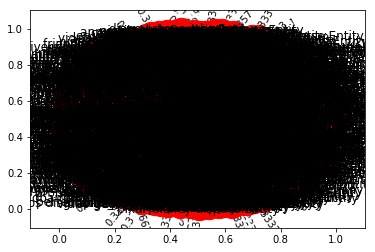

In [26]:
visualize_graph(G)

In [59]:
G.nodes(data=True)[:5]

[(u'11 presentation lessons:Entity',
  {'did': ['doc-0'],
   'dtitle': ['./docs/doc1.txt'],
   'matched': '',
   'sid': [('sent-858', 'doc-0')],
   'weight': 0.0}),
 (u'laid:Predicate:1',
  {'did': ['doc-4'],
   'dtitle': ['./docs/doc5.txt'],
   'matched': '',
   'sid': [('sent-269', 'doc-4')],
   'weight': 0.0}),
 (u'hollywood reporter:Entity',
  {'did': ['doc-0', 'doc-0', 'doc-0'],
   'dtitle': ['./docs/doc1.txt', './docs/doc1.txt', './docs/doc1.txt'],
   'matched': '',
   'sid': [('sent-1202', 'doc-0'),
    ('sent-1049', 'doc-0'),
    ('sent-1049', 'doc-0')],
   'weight': 0.0}),
 (u'believe in:Predicate:1',
  {'did': ['doc-4'],
   'dtitle': ['./docs/doc5.txt'],
   'matched': '',
   'sid': [('sent-135', 'doc-4')],
   'weight': 0.0}),
 (u'john markoff:Entity',
  {'did': ['doc-8'],
   'dtitle': ['./docs/doc9.txt'],
   'matched': '',
   'sid': [('sent-3', 'doc-8')],
   'weight': 0.0})]

In [60]:
G.edges(data=True)[:5]

[(u'11 presentation lessons:Entity',
  u'learn from:Predicate:1',
  {'did': ['doc-0'],
   'dtitle': ['./docs/doc1.txt'],
   'etype': 'Triple',
   'sid': [('sent-858', 'doc-0')],
   'weight': 0.25,
   'wlist': [0.25]}),
 (u'laid:Predicate:1',
  u'vision:Entity',
  {'did': ['doc-4'],
   'dtitle': ['./docs/doc5.txt'],
   'etype': 'Triple',
   'sid': [('sent-269', 'doc-4')],
   'weight': 0.3333333333333333,
   'wlist': [0.3333333333333333]}),
 (u'laid:Predicate:1',
  u'steve jobs:Entity',
  {'did': ['doc-4'],
   'dtitle': ['./docs/doc5.txt'],
   'etype': 'Triple',
   'sid': [('sent-269', 'doc-4')],
   'weight': 0.5,
   'wlist': [0.5]}),
 (u'believe in:Predicate:1',
  u'steve jobs:Entity',
  {'did': ['doc-4'],
   'dtitle': ['./docs/doc5.txt'],
   'etype': 'Triple',
   'sid': [('sent-135', 'doc-4')],
   'weight': 1.0,
   'wlist': [1.0]}),
 (u'book steve jobs:Predicate:1',
  u'biographer:Entity',
  {'did': ['doc-2'],
   'dtitle': ['./docs/doc3.txt'],
   'etype': 'Triple',
   'sid': [('sent-72

In [61]:
nodes=[]
links=[]

In [62]:
nodes = [{'id': i, 'label': i.encode('ascii', 'ignore').decode('ascii')}
         for i in G.nodes()]

In [63]:
nodes[:5]

[{'id': u'11 presentation lessons:Entity',
  'label': u'11 presentation lessons:Entity'},
 {'id': u'laid:Predicate:1', 'label': u'laid:Predicate:1'},
 {'id': u'hollywood reporter:Entity', 'label': u'hollywood reporter:Entity'},
 {'id': u'believe in:Predicate:1', 'label': u'believe in:Predicate:1'},
 {'id': u'john markoff:Entity', 'label': u'john markoff:Entity'}]

In [64]:
links = [{'source': u[0], 'target': u[1], 'label': G[u[0]][u[1]]['etype'] }
         for u in G.edges()]

In [65]:
links[:5]

[{'label': 'Triple',
  'source': u'11 presentation lessons:Entity',
  'target': u'learn from:Predicate:1'},
 {'label': 'Triple',
  'source': u'laid:Predicate:1',
  'target': u'vision:Entity'},
 {'label': 'Triple',
  'source': u'laid:Predicate:1',
  'target': u'steve jobs:Entity'},
 {'label': 'Triple',
  'source': u'believe in:Predicate:1',
  'target': u'steve jobs:Entity'},
 {'label': 'Triple',
  'source': u'book steve jobs:Predicate:1',
  'target': u'biographer:Entity'}]

In [66]:
with open('0_Add_SPO_Tri_EG_graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links}, f, indent=4,)

In [99]:
G[s[0]][s[1]]

{'did': [],
 'dtitle': [],
 'etype': 'Predicate_Alignment',
 'sid': [],
 'weight': 0.81314684327087883,
 'wlist': [0.81314684327087883]}

In [135]:
G[s[0]][s[1]]['etype']

0.81314684327087883

In [ ]:
# json.dump({'nodes': nodes, 'links': edges}, open('filename.json', 'w'))

In [27]:
# from networkx.readwrite import json_graph
# data = json_graph.node_link_data(G)

In [71]:
# data

In [68]:
# import json
# s = json.dumps(data)
# with open('0_testGraph.json', 'w') as f:
#     json.dump(data, f)

In [69]:
# s 

In [70]:
# s1 = json.dumps(data)
# s1

In [ ]:
##read 
# # Reading data back

# with open('0_testGraph.json', 'r') as f:
#     data = json.load(f)

### 1-Adding type nodes and type edges

In [82]:
def get_hearst_patterns_from_context(f22):
    '''
	s=""
	for l in f22:
		l=(l.strip()).split('\t')
		if l[0].startswith('sent-') and len(l)>1:
			s=s+replace_symbols(l[2])+' '
			
	h = HearstPatterns(extended = True)
	HP=h.find_hyponyms(s.decode('utf-8'))
	
        '''
    h = HearstPatterns(extended=True)
    HP = set()
    lc = 0
    for l in f22:
        l = (l.strip()).split('\t')
        # print "line ",lc,l
        if l[0].startswith('sent-') and len(l) > 1:
            s = replace_symbols(l[2])
            # s=l[1]#.strip()
            # print "line ",lc,s.decode('utf-8')
            HP1 = set(h.find_hyponyms(s.decode('utf-8')))
            HP = HP.union(HP1)
        lc += 1

    # HP=[]
    if verbose:
        print "HP are ", HP
        
    return HP

In [73]:
def add_type_edges(G, HP):
    for pat in HP:
        p1 = (pat[0].decode('utf-8')).lower() + ':Entity'
        if p1 in G.nodes():
            p2 = (remove_leading_article(pat[1]).decode('utf-8')).lower()
            if verbose:
                print "Removed articles ", p2
            # if p2+':Entity' in G.nodes():
            #	p2+=':Entity'
            # else:
            p2 += ':Type'  # creating type nodes irrespective of same name entity node exists or not
            if p2 not in G.nodes():
                G = add_node_triple(G, p2, [], [],
                                    [])  # Adding a "Type" node; not using typical nodes with only labeled "type"
                G.add_edge(p1, p2, weight=1.0, wlist=[1.0], etype='Type', did=[], dtitle=[], sid=[])
            else:
                if (p1, p2) not in G.edges():
                    G.add_edge(p1, p2, weight=1.0, wlist=[1.0], etype='Type', did=[], dtitle=[],
                               sid=[])  # Assuming there do not exist other edges between entity and "Type" nodes

    return G

In [74]:
def add_NE_type_edges(G, NE_types):
    for pat in NE_types:
        p1 = (pat[0].encode('utf-8')).lower() + ':Entity'
        if p1 in G.nodes():
            p2 = (pat[1]).lower()
            if verbose:
                print "NE_Type ", p1, p2
            # if p2+':Entity' in G.nodes():
            #	p2+=':Entity'
            # else:
            p2 += ':Type'  # creating type nodes irrespective of same name entity node exists or not
            if p2 not in G.nodes():
                G = add_node_triple(G, p2, [], [],
                                    [])  # Adding a "Type" node; not using typical nodes with only labeled "type"
                G.add_edge(p1, p2, weight=1.0, wlist=[1.0], etype='Type', did=[], dtitle=[], sid=[])
            else:
                if (p1, p2) not in G.edges():
                    G.add_edge(p1, p2, weight=1.0, wlist=[1.0], etype='Type', did=[], dtitle=[],
                               sid=[])  # Assuming there do not exist other edges between entity and "Type" nodes

    return G

In [75]:
def replace_symbols(s):
    s = s.replace('(', ' ')
    s = s.replace(')', ' ')
    s = s.replace('[', ' ')
    s = s.replace(']', ' ')
    s = s.replace('{', ' ')
    s = s.replace('}', ' ')
    s = s.replace('|', ' ')
    s = s.replace('"', ' ')
    s = s.replace('\'', ' ')
    s = s.replace('\n', ' ')
    # s=s.replace(',','')
    # s=s.replace('others','other ones')
    # s=s.replace('Others','Other ones')
    s = s.strip(',')
    s = s.strip()
    s = s + '.'
    return s

In [76]:
def remove_leading_article(t):  # remove leading articles from type nodes detected by hearst algo
    t = t.split()
    s = ''
    articles = ['a', 'an', 'the', 'some', 'one', 'few']
    i = 0
    for i in range(0, len(t)):
        if t[i] not in articles:
            break
    # while t[i] in articles:
    #	i+=1
    if len(t) > 0:
        s = t[i]
        for j in range(i + 1, len(t)):
            s += ' ' + t[j]
    else:
        if verbose:
            print 'PROBLEM leading article ', t
    return s


In [77]:
NE_types=[]

In [78]:
NE_types.append(('steve jobs','NE'))

In [81]:
f22

<open file './files/context_ques-q1', mode 'r' at 0x257f1f8a0>

In [83]:
HP = get_hearst_patterns_from_context(f22)

In [85]:
h = HearstPatterns(extended=True)
h

In [108]:
f22=open("./files/context_ques-q1")

In [109]:
lines = f22.readlines()
lines

['doc-0\t./docs/doc1.txt\thttps://en.wikipedia.org/wiki/Steve_Jobs\n',
 '\t\tsent-0\t\tCentralNotice  From Wikipedia, the free encyclopedia Jump to navigation Jump to search This article is about the person.\n',
 '\t\tsent-1\t\tFor other uses, see  Steve Jobs  disambiguation  American entrepreneur and co-founder of Apple Inc.\n',
 '\t\tsent-2\t\tJobs in 2010 Steven Paul Jobs February 24, 1955 October 5, 2011 Palo Alto, California Alta Mesa Memorial Park Pioneer of the  personal computer revolution  with  Co-creator of the  , and first  US$7 billion  September 2011  Co-founder, Chairman, and CEO of  Primary investor and Chairman of  Founder, Chairman, and CEO of  The Walt Disney Company 4, including  Steven Paul Jobs ; February 24, 1955 \xe2\x80\x93 October 5, 2011  was an American  , and  .\n',
 "\t\tsent-3\t\tHe was the chairman, chief executive officer  CEO , and co-founder of  , the chairman and majority shareholder of  , a member of  The Walt Disney Company 's board of directors fo

In [112]:
HP = set()
lc = 0
for l in lines:
    l = (l.strip()).split('\t')
    # print "line ",lc,l
    if l[0].startswith('sent-') and len(l) > 1:
        s = replace_symbols(l[2])
        # s=l[1]#.strip()
        # print "line ",lc,s.decode('utf-8')
        HP1 = set(h.find_hyponyms(s.decode('utf-8')))
        HP = HP.union(HP1)
    lc += 1

In [113]:
l

['sent-66',
 '',
 'main   link-v-med-2   emma form compo pop would go here   quantcast   buysellads   amazon links  world version    cheetah']

In [114]:
HP1

set()

In [115]:
HP

{(u'Amazon', u'companies'),
 (u'Apple', u'the inventor'),
 (u'Apple Formally Names Jobs', u'Interim Chief'),
 (u'Apple University', u'internal business track'),
 (u'Apples', u'fruits'),
 (u'Atari', u'a video game designer'),
 (u'Atari Corporation', u'a designer'),
 (u'CS1 maint archived copy', u'title CS1 maint BOT original'),
 (u'Ethernet', u'decades'),
 (u'Firefox', u'another browser'),
 (u'Hansel', u'pavement'),
 (u'Homestead classmate', u'kind'),
 (u'IBM', u'GUIs'),
 (u'Jobs', u'a guest'),
 (u'Jobs', u'a mature'),
 (u'Jobs', u'an odd individual'),
 (u'Mac', u'the new computer'),
 (u'Macintosh', u'a business alternative'),
 (u'Macintosh', u'a piece'),
 (u'Microsoft', u'companies'),
 (u'Mountain View home', u'a child Mountain View Voice '),
 (u'Paul', u'Coast Guard veteran'),
 (u'Paul Reinhold Jobs', u'Coast Guard mechanic'),
 (u'Safari', u'another browser'),
 (u'Seattle', u'places'),
 (u'Silcon Valley', u'places'),
 (u'Steve Jobs Resigns', u'CEO'),
 (u'Sun', u'competitors'),
 (u'Vol

In [116]:
G = add_type_edges(G, HP)


In [117]:
G = add_NE_type_edges(G, NE_types)

In [118]:
NE_types

[('steve jobs', 'NE')]

In [119]:
nodes=[]
links=[]
nodes = [{'id': i, 'label': i.encode('ascii', 'ignore').decode('ascii')}
         for i in G.nodes()]
links = [{'source': u[0], 'target': u[1], 'label': G[u[0]][u[1]]['etype'] }
         for u in G.edges()]


In [120]:
nodes[:5]

[{'id': u'11 presentation lessons:Entity',
  'label': u'11 presentation lessons:Entity'},
 {'id': u'laid:Predicate:1', 'label': u'laid:Predicate:1'},
 {'id': u'hollywood reporter:Entity', 'label': u'hollywood reporter:Entity'},
 {'id': u'believe in:Predicate:1', 'label': u'believe in:Predicate:1'},
 {'id': u'john markoff:Entity', 'label': u'john markoff:Entity'}]

In [121]:
links[:5]

[{'label': 'Triple',
  'source': u'11 presentation lessons:Entity',
  'target': u'learn from:Predicate:1'},
 {'label': 'Triple',
  'source': u'laid:Predicate:1',
  'target': u'vision:Entity'},
 {'label': 'Triple',
  'source': u'laid:Predicate:1',
  'target': u'steve jobs:Entity'},
 {'label': 'Triple',
  'source': u'believe in:Predicate:1',
  'target': u'steve jobs:Entity'},
 {'label': 'Triple',
  'source': u'book steve jobs:Predicate:1',
  'target': u'biographer:Entity'}]

In [122]:
with open('1_Add_Type_ND_EG_graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links}, f, indent=4,)

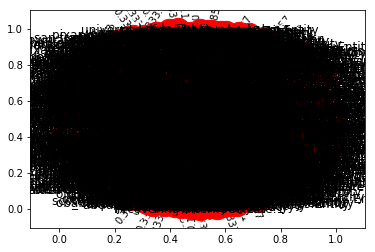

In [41]:
visualize_graph(G)

### -Add wiki categories as types

In [123]:
if Wikitype_flag == 1:
    f22.close()
    f22 = open(f2, 'r')

    # Add wiki categories as types
    wiki_cat = get_wiki_categories_from_context(f22, Wiki_Threshold)
    G = add_wiki_type_edges(G, wiki_cat)
    if verbose:
        print "\n\nSize of the graph after wiki edges", len(G.nodes()), len(G.edges())


### -Read Glove embeddings

In [124]:
def read_glove(G, q_ent, gdict):
    veclen = 300
    g_pred = {}
    g_ent = {}
    g_type = {}
    g_ques = {}
    done = set()

    '''
	gdict={}
	
	if option=='GLOVE':
		glove_file='/home/pramanik/QUEST/files/glove.6B/glove.6B.300d.txt'
		fg=open(glove_file,'r')
		for line in fg:
			line=(line.strip()).split()
			vec=[]
			for i in range(1,len(line)):
				vec.append(float(line[i]))
			gdict[line[0]]=np.array(vec)
	
	else:
		gdict=word_vectors
	'''

    for n in G.nodes():
        if n not in done:
            done.add(n)
            nn = n.split(':')
            nw1 = nn[0].replace('-', ' ').split()
            avec = np.zeros(veclen)
            c = 0.0
            for el in nw1:
                if el in gdict and el.lower() not in stop_list:
                    # if option=='GLOVE':
                    #	avec=np.add(avec,gdict[el])
                    # else:
                    avec = np.add(avec, np.array(gdict[el]))
                    c += 1.0
            if c > 0:
                avec = np.divide(avec, c)

                if nn[1] == 'Predicate':
                    g_pred[n] = avec.tolist()
                else:
                    if nn[1] == 'Entity':
                        g_ent[n] = avec.tolist()
                    else:
                        g_type[n] = avec.tolist()
        # if verbose:
        # print len(G.nodes()),len(done)

    for n in q_ent:
        if n not in done:
            done.add(n)
            nw1 = n.replace('-', ' ').split()
            avec = np.zeros(veclen)
            c = 0.0
            for el in nw1:
                if el in gdict and el.lower() not in stop_list:
                    # if option=='GLOVE':
                    #	avec=np.add(avec,gdict[el])
                    # else:
                    avec = np.add(avec, np.array(gdict[el]))
                    c += 1.0
            if c > 0:
                avec = np.divide(avec, c)
                g_ques[n] = avec.tolist()

    return g_pred, g_ent, g_type, g_ques

In [125]:
g_pred, g_ent, g_type, g_ques = read_glove(G, q_ent, gdict)

In [131]:
avec[:5]

array([ 0.01489258,  0.01391602, -0.0234375 ,  0.10205078, -0.14004517])

In [136]:
G.nodes(data=True)[0]

(u'11 presentation lessons:Entity',
 {'did': ['doc-0'],
  'dtitle': ['./docs/doc1.txt'],
  'matched': '',
  'sid': [('sent-858', 'doc-0')],
  'weight': 0.0})

In [143]:
G.nodes()[1]

u'laid:Predicate:1'

In [145]:
g_pred[G.nodes()[1]][:5]

[0.0859375, 0.033203125, 0.439453125, 0.1376953125, 0.248046875]

In [150]:
G.nodes()[4]

u'john markoff:Entity'

In [149]:
g_ent[G.nodes()[4]]

[-0.25390625,
 0.1474609375,
 -0.08154296875,
 0.208984375,
 -0.2216796875,
 -0.263671875,
 -0.234375,
 -0.1533203125,
 0.2392578125,
 0.0179443359375,
 -0.1806640625,
 -0.294921875,
 0.0203857421875,
 -0.01446533203125,
 0.10986328125,
 0.058349609375,
 0.1513671875,
 0.173828125,
 0.1318359375,
 -0.10302734375,
 -0.1357421875,
 -0.0712890625,
 0.31640625,
 -0.2001953125,
 -0.13671875,
 0.054443359375,
 -0.1181640625,
 0.412109375,
 -0.006927490234375,
 0.07373046875,
 0.0986328125,
 0.171875,
 -0.05908203125,
 -0.1064453125,
 -0.0052490234375,
 0.0458984375,
 -0.265625,
 0.326171875,
 0.1474609375,
 -0.06640625,
 -0.2431640625,
 0.0076904296875,
 0.28515625,
 -0.000751495361328125,
 0.146484375,
 0.09033203125,
 0.2255859375,
 -0.1025390625,
 -0.0810546875,
 0.078125,
 0.126953125,
 0.08154296875,
 0.1572265625,
 0.0439453125,
 -0.12890625,
 -0.1865234375,
 -0.036865234375,
 -0.1298828125,
 0.1279296875,
 -0.2275390625,
 0.173828125,
 0.185546875,
 -0.302734375,
 0.1298828125,
 -0.12

In [162]:
g_type[G.nodes()[11]][:5]

KeyError: u'things digital conference in:Predicate:1'

In [163]:
nodes=[]
links=[]
nodes = [{'id': i, 'label': i.encode('ascii', 'ignore').decode('ascii')}
         for i in G.nodes()]
links = [{'source': u[0], 'target': u[1], 'label': G[u[0]][u[1]]['etype'] }
         for u in G.edges()]

In [164]:
with open('1_Add_Type_ND_EG_graph_2.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links}, f, indent=4,)

### 2-Adding predicate alignment edges

In [165]:
def add_predicate_alignment_edges(G, g_pred, gdict):
    if MAX_MATCH == 0:
        for n1 in G.nodes():
            nn1 = n1.split(':')
            if nn1[1] == 'Predicate' and n1 in g_pred:
                for n2 in G.nodes():
                    nn2 = n2.split(':')
                    if n2 != n1 and nn2[1] == 'Predicate' and n2 in g_pred:
                        value = cosine_similarity(g_pred[n1], g_pred[n2])
                        if value >= threshold:
                            value = round(value, 2)
                            # Add bidirectional alignment edges between the predicates; no associated doc with edge
                            G.add_edge(n1, n2, weight=value, wlist=[value], etype='Predicate_Alignment', did=[],
                                       dtitle=[], sid=[])
                            G.add_edge(n2, n1, weight=value, wlist=[value], etype='Predicate_Alignment', did=[],
                                       dtitle=[], sid=[])
                            if verbose:
                                print "Predicate Alignment Edge ", n1, n2, G.get_edge_data(n1, n2)
                                print "Predicate Alignment Edge ", n2, n1, G.get_edge_data(n2, n1)
    else:
        for n1 in G.nodes():
            nn1 = n1.split(':')
            if nn1[1] == 'Predicate':
                for n2 in G.nodes():
                    nn2 = n2.split(':')
                    if n2 != n1 and nn2[1] == 'Predicate':
                        value = cosine_similarity_MAX_MATCH(nn1[0], nn2[0], gdict)
                        if value >= threshold:
                            value = round(value, 2)
                            # Add bidirectional alignment edges between the predicates; no associated doc with edge
                            G.add_edge(n1, n2, weight=value, wlist=[value], etype='Predicate_Alignment', did=[],
                                       dtitle=[], sid=[])
                            G.add_edge(n2, n1, weight=value, wlist=[value], etype='Predicate_Alignment', did=[],
                                       dtitle=[], sid=[])
                            if verbose:
                                print "Predicate Alignment Edge ", n1, n2, G.get_edge_data(n1, n2)
                                print "Predicate Alignment Edge ", n2, n1, G.get_edge_data(n2, n1)
    return G


In [166]:
G = add_predicate_alignment_edges(G, g_pred, gdict)

### -Add relation alignment edges from glove embeddings

In [170]:
if Type_Alignment_flag == 1:
    print "\n\nAdding type alignment edges..."
    G = add_type_alignment_edges(G, g_type, gdict)
    if verbose:
        print "\n\nSize of the graph ", len(G.nodes()), len(G.edges())


In [172]:
nodes=[]
links=[]
nodes = [{'id': i, 'label': i.encode('ascii', 'ignore').decode('ascii')}
         for i in G.nodes()]
links = [{'source': u[0], 'target': u[1], 'label': G[u[0]][u[1]]['etype'] }
         for u in G.edges()]

In [173]:
with open('2_Add_Pre_Ali_graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links}, f, indent=4,)

In [ ]:
# visualize_graph(G)

### 3-Add entity alignment edges from mention dictonary

In [175]:
def add_entity_alignment_edges(G, mention_dict, g_ent):
    for n1 in G.nodes():
        nn1 = n1.split(':')
        if nn1[1] == 'Entity':
            for n2 in G.nodes():
                nn2 = n2.split(':')
                if n2 != n1 and nn2[1] == 'Entity':
                    if nn1[0] in mention_dict and nn2[0] in mention_dict:
                        inter = len(mention_dict[nn1[0]].intersection(mention_dict[nn2[0]]))
                        uni = len(mention_dict[nn1[0]].union(mention_dict[nn2[0]]))
                        jack = float(inter) / float(uni)
                        if jack >= threshold2:
                            value = round(jack, 2)
                            # Add bidirectional alignment edges between the predicates; no associated doc with edge
                            G.add_edge(n1, n2, weight=value, wlist=[value], etype='Entity_Alignment', did=[], dtitle=[],
                                       sid=[])
                            G.add_edge(n2, n1, weight=value, wlist=[value], etype='Entity_Alignment', did=[], dtitle=[],
                                       sid=[])
                            if verbose:
                                print "Entity Alignment Edge ", n1, n2, G.get_edge_data(n1, n2)
                                print "Entity Alignment Edge ", n2, n1, G.get_edge_data(n2, n1)

                    else:
                        '''
						if n1 in g_ent:
							avec=g_ent[n1]
							for n2 in G.nodes():
								nn2=n2.split(':')
								if n2!=n1 and nn2[1]=='Entity' and n2 in g_ent:
									bvec=g_ent[n2]
									value=cosine_similarity(avec,bvec)	
									if value>threshold2:
										value=round(value,2)
										#Add bidirectional alignment edges between the predicates; no associated doc with edge
										G.add_edge(n1,n2,weight=value,wlist=[value],etype='Entity_Alignment',did=[],dtitle=[],sid=[])
										G.add_edge(n2,n1,weight=value,wlist=[value],etype='Entity_Alignment',did=[],dtitle=[],sid=[])
										if verbose:
											print "Entity Alignment Edge ",n1,n2,G.get_edge_data(n1,n2)
											print "Entity Alignment Edge ",n2,n1,G.get_edge_data(n2,n1)					
						'''
                        part1 = nn1[0].replace(',', ' ')
                        part1 = part1.replace('-', ' ')
                        wn1 = set(part1.split())
                        part2 = nn2[0].replace(',', ' ')
                        part2 = part2.replace('-', ' ')
                        wn2 = set(part2.split())

                        inter = len(wn1.intersection(wn2))
                        uni = len(wn1.union(wn2))
                        jack = float(inter) / float(uni)
                        if jack >= threshold2:
                            value = round(jack, 2)
                            # Add bidirectional alignment edges between the predicates; no associated doc with edge
                            G.add_edge(n1, n2, weight=value, wlist=[value], etype='Entity_Alignment', did=[], dtitle=[],
                                       sid=[])
                            G.add_edge(n2, n1, weight=value, wlist=[value], etype='Entity_Alignment', did=[], dtitle=[],
                                       sid=[])
                            if verbose:
                                print "Entity Alignment Edge ", n1, n2, G.get_edge_data(n1, n2)
                                print "Entity Alignment Edge ", n2, n1, G.get_edge_data(n2, n1)

    return G

In [176]:
G2 = add_entity_alignment_edges(G, mention_dict, g_ent)

In [179]:
def directed_to_undirected(G1):
    G = nx.Graph()
    for n in G1.nodes():
        G.add_node(n, weight=G1.node[n]['weight'], matched=G1.node[n]['matched'], did=G1.node[n]['did'],
                   dtitle=G1.node[n]['dtitle'], sid=G1.node[n]['sid'])
    done = set()
    elist = []
    for (n1, n2) in G1.edges():
        if (n1, n2) not in done:
            done.add((n1, n2))
            done.add((n2, n1))
            data = G1.get_edge_data(n1, n2)
            d = data['weight']
            wlist1 = data['wlist']
            did1 = data['did']
            dtitle1 = data['dtitle']
            sid1 = data['sid']
            etype1 = data['etype']

            # print "n1,n2 ->",data

            if (n2, n1) in G1.edges():
                data1 = G1.get_edge_data(n2, n1)
                # print "n2,n1 ->",data1
                if data1['etype'] == 'Triple':
                    if data1['weight'] > d:  # Keeping maximum weight edge
                        d = data1['weight']

                    for w in data1['wlist']:
                        # print "wlist",w,wlist1
                        wlist1.append(w)
                    for di in data1['did']:
                        # print "did",di,did1
                        did1.append(di)
                    for dt in data1['dtitle']:
                        # print "dtitle",dt,dtitle1
                        dtitle1.append(dt)
                    for si in data1['sid']:
                        # print "sid",si,sid1
                        sid1.append(si)

            for i in range(0, len(wlist1)):
                # print "i ",i
                if wlist1[i] > 1.0 and wlist1[i] <= 1.0001:
                    wlist1[i] = 1.0
            if d > 1.0 and d <= 1.0001:
                d = 1.0
            elist.append((n1, n2, d, wlist1, etype1))
            G.add_edge(n1, n2, weight=d, wlist=wlist1, etype=etype1, did=did1, dtitle=dtitle1, sid=sid1)

    flag = 0
    elist = sorted(elist, key=lambda x: x[2], reverse=True)
    # for ee in elist:
    #    print "edges ", ee[0],ee[1],ee[2],ee[3],ee[4]

    for (n1, n2) in G.edges():
        data = G.get_edge_data(n1, n2)
        d = data['weight']
        wlist1 = data['wlist']

        if d > 1:
            if verbose:
                print 'Error neg weight from QKG d..', n1, n2, data['etype'], d, wlist1
            flag += 1

        for ww in wlist1:
            if ww > 1:
                if verbose:
                    print 'Error neg weight from QKG wlist..', n1, n2, data['etype'], ww, wlist1
                flag += 1
    if verbose:
        print "no. of neg weights ", flag
    return G

In [180]:
G = directed_to_undirected(G2)
if len(G.nodes()) > 0:
    G = max(nx.connected_component_subgraphs(G), key=len)

In [199]:
G.nodes(data=True)[0]

(u'11 presentation lessons:Entity',
 {'did': ['doc-0'],
  'dtitle': ['./docs/doc1.txt'],
  'matched': '',
  'sid': [('sent-858', 'doc-0')],
  'weight': 0.0})

In [201]:
G.edges(data=True)[0]

(u'11 presentation lessons:Entity',
 u'learn from:Predicate:1',
 {'did': ['doc-0'],
  'dtitle': ['./docs/doc1.txt'],
  'etype': 'Triple',
  'sid': [('sent-858', 'doc-0')],
  'weight': 0.25,
  'wlist': [0.25]})

In [181]:
nodes=[]
links=[]
nodes = [{'id': i, 'label': i.encode('ascii', 'ignore').decode('ascii')}
         for i in G.nodes()]
links = [{'source': u[0], 'target': u[1], 'label': G[u[0]][u[1]]['etype'] }
         for u in G.edges()]

In [182]:
with open('3_Add_EN_Ali_EG_graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links}, f, indent=4,)

### 4-Add node weights

In [184]:
def add_node_weights(G, g_ent, g_pred, g_type, gdict, g_ques, q_ent, mention_dict, type_qent, Cornerstone_Matching):
    if verbose:
        print "\n\nQuestion entities->", q_ent
    for qe in g_ent:
        if verbose:
            print qe
    veclen = 300
    for n1 in G.nodes():
        nn1 = n1.split(':')

        if nn1[1] == 'Entity':
            if nn1[0] in q_ent and (type_qent[nn1[0]] == 'S' or type_qent[nn1[0]] == 'NE' or Cornerstone_Matching == 0):
                max_val = 1.0
                max_word = nn1[0]
                G.node[n1]['weight'] = round(max_val, 2)
                G.node[n1]['matched'] = max_word
                if verbose:
                    print "\nExact match entity, weight", n1, max_val, max_word
            else:
                max_val = 0.0
                max_word = ""
                for w in q_ent:
                    if type_qent[w] == 'S' or type_qent[w] == 'NE' or Cornerstone_Matching == 0:
                        if nn1[0] in mention_dict and w in mention_dict:
                            inter = len(mention_dict[nn1[0]].intersection(mention_dict[w]))
                            uni = len(mention_dict[nn1[0]].union(mention_dict[w]))
                            jack = float(inter) / float(uni)

                        else:
                            part1 = nn1[0].replace(',', ' ')
                            part1 = part1.replace('-', ' ')
                            wn1 = set(part1.split())
                            part2 = w.replace(',', ' ')
                            part2 = part2.replace('-', ' ')
                            wn2 = set(part2.split())

                            inter = len(wn1.intersection(wn2))
                            uni = len(wn1.union(wn2))
                            jack = float(inter) / float(uni)

                        if jack > max_val:
                            max_val = jack
                            max_word = w

                # if max_val>=threshold2:
                G.node[n1]['weight'] = round(max_val, 2)
                G.node[n1]['matched'] = max_word
                if verbose:
                    print "\nDICT Entity, match, weight", n1, max_val, max_word

        else:
            if nn1[0] in q_ent and (type_qent[nn1[0]] == 'P' or Cornerstone_Matching == 0):
                max_val = 1.0
                max_word = nn1[0]
                G.node[n1]['weight'] = round(max_val, 2)
                G.node[n1]['matched'] = max_word
                if verbose:
                    print "\nExact match predicate, weight", n1, max_val, max_word
            else:
                if MAX_MATCH == 0:
                    avec = np.zeros(veclen)
                    update = 0
                    if n1 in g_pred:  # and nn1[1]=='Predicate':
                        avec = g_pred[n1]
                        update = 1
                    else:
                        if n1 in g_type:
                            avec = g_type[n1]
                            update = 1
                    if update == 0:
                        if verbose:
                            print "\n\nNO VECTOR FOR ->", n1.encode('utf-8')
                    max_val = 0.0
                    max_word = ""
                    for w in q_ent:
                        if w in g_ques and (type_qent[w] == 'P' or Cornerstone_Matching == 0):
                            bvec = g_ques[w]
                            value = cosine_similarity(avec, bvec)
                            if value > max_val:
                                max_val = value
                                max_word = w
                    # if max_val>=threshold:	
                    G.node[n1]['weight'] = round(max_val, 2)
                    G.node[n1]['matched'] = max_word
                    if verbose:
                        print "\nPredicate, match, weight", n1, max_val, max_word
                else:
                    max_val = 0.0
                    max_word = ""
                    for w in q_ent:
                        if type_qent[w] == 'P' or Cornerstone_Matching == 0:
                            value = cosine_similarity_MAX_MATCH(nn1[0], w, gdict)
                            if value > max_val:
                                max_val = value
                                max_word = w
                    # if max_val>=threshold:	
                    G.node[n1]['weight'] = round(max_val, 2)
                    G.node[n1]['matched'] = max_word
                    if verbose:
                        print "\nPredicate, match, weight", n1, max_val, max_word

    return G


In [185]:
G = add_node_weights(G, g_ent, g_pred, g_type, gdict, g_ques, q_ent, mention_dict, type_qent, Cornerstone_Matching)
print "\n\nFinal size of the graph (nodes, edges) - ", len(G.nodes()), len(G.edges())
# visualize_graph(G)



if Distribute_Node_wt_flag == 2:
    G = distribute_node_weights(G)

nx.write_gpickle(G, f6)

match_flag = 0
for gt in gt1:
    for n in G.nodes():
        nn = n.split(':')
        if len(nn) > 0:
            if nn[0] == (gt.lower()).decode('utf-8'):
                match_flag = 1
        else:
            if n == (gt.lower()).decode('utf-8'):
                match_flag = 1
cornerstone = {}
corner1 = {}
for n in G.nodes():
    if (n.split(':')[1] == 'Entity' and G.node[n]['weight'] >= threshold2) or (
            n.split(':')[1] != 'Entity' and G.node[n]['weight'] >= threshold):
        # cornerstone[n]=G.node[n]['matched']
        if G.node[n]['matched'] not in corner1:
            corner1[G.node[n]['matched']] = set()
        corner1[G.node[n]['matched']].add(n)

q_ent = set()  # keeping terms with non-zero cornerstones
corner_ct = 0
for ent in corner1:
    q_ent.add(ent)
    corner_ct += len(corner1[ent])



Final size of the graph (nodes, edges) -  1454 8509


In [186]:
nodes=[]
links=[]
nodes = [{'id': i, 'label': i.encode('ascii', 'ignore').decode('ascii')}
         for i in G.nodes()]
links = [{'source': u[0], 'target': u[1], 'label': G[u[0]][u[1]]['etype'] }
         for u in G.edges()]
with open('4_Add_ND_W_graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links}, f, indent=4,)

In [187]:
if len(q_ent) > prune:
    if verbose:
        print "prunning again based on NE..."  # ,q_ent,corner1
    p = frozenset(q_ent)
    for s in p:
        if type_qent[s] == 'S':
            q_ent.remove(s)
    if verbose:
        print "With only NE Query terms ->", len(q_ent), q_ent

    if len(q_ent) < prune:
        if verbose:
            print "adding back few Subject terms to fulfil upto prune ..."

        clist = []
        for ent in corner1:
            if ent not in q_ent and type_qent[ent] == 'S':
                clist.append((ent, len(corner1[ent])))
        clist = sorted(clist, key=lambda x: x[1], reverse=True)
        p = frozenset(q_ent)

        if verbose:
            print "p, q_ent, clist, prune-len(p)", p, q_ent, clist, prune - len(p)

        for i in range(0, prune - len(p)):
            q_ent.add(clist[i][0])
    else:
        if len(q_ent) > prune:
            if verbose:
                print "prunning again based on number of cornerstones per query term..."
            clist = []
            for ent in q_ent:
                clist.append((ent, len(corner1[ent])))
            clist = sorted(clist, key=lambda x: x[1], reverse=True)
            q_ent = set()
            for i in range(0, prune):
                q_ent.add(clist[i][0])

    corner2 = {}
    for v in corner1:
        if v in q_ent:
            corner2[v] = corner1[v]
    corner1 = corner2

In [190]:
p

frozenset({'born', 'steve jobs', 'was'})

In [192]:
q_ent

{'born', 'steve jobs'}

In [189]:
prune

5

In [188]:
corner1

{'born': {u'birth after:Predicate:1',
  u'birth family during:Predicate:1',
  u'birth father:Predicate:1',
  u'birth mother out:Predicate:1',
  u'born in:Predicate:1',
  u'born in:Predicate:2',
  u'born in:Predicate:3',
  u'born in:Predicate:4',
  u'born in:Predicate:5',
  u'born in:Predicate:6',
  u'born in:Predicate:7',
  u'born in:Predicate:8',
  u'born into:Predicate:1',
  u'born on:Predicate:1',
  u'born on:Predicate:10',
  u'born on:Predicate:2',
  u'born on:Predicate:3',
  u'born on:Predicate:4',
  u'born on:Predicate:5',
  u'born on:Predicate:6',
  u'born on:Predicate:7',
  u'born on:Predicate:8',
  u'born on:Predicate:9',
  u'born out:Predicate:1',
  u'born:Predicate:1',
  u'born:Predicate:2',
  u'born:Predicate:3',
  u'born:Predicate:4',
  u'born:Predicate:5',
  u'born:Predicate:6',
  u'born:Predicate:7',
  u'born:Predicate:8',
  u'born:Predicate:9',
  u'british-born industrial designer:Entity',
  u'emigrated from:Predicate:1',
  u'married because:Predicate:1',
  u'married in

In [193]:
cornerstone = {}
for v in corner1:
    for e in corner1[v]:
        cornerstone[e] = v
if verbose:
    print "Final query terms -->", len(q_ent), q_ent
    print "\nCornerStones Are --->", len(corner1), len(cornerstone)
for v in corner1:
    if verbose:
        print "\n", v, corner1[v], len(corner1[v])
# pickle.dump(cornerstone, open(f7, 'w'))

In [194]:
cornerstone

{u'11 steve jobs:Entity': 'steve jobs',
 u'1985 jobs:Entity': 'steve jobs',
 u'1986 jobs:Entity': 'steve jobs',
 u'2003 jobs:Entity': 'steve jobs',
 u'2009 jobs:Entity': 'steve jobs',
 u'actor steve carell:Entity': 'steve jobs',
 u'adoption jobs:Entity': 'steve jobs',
 u'after jobs:Entity': 'steve jobs',
 u'apple co-founder 06 oct 2011 steve jobs:Entity': 'steve jobs',
 u'apple co-founder steve jobs:Entity': 'steve jobs',
 u'apple jobs:Entity': 'steve jobs',
 u'biological father steve jobs:Entity': 'steve jobs',
 u'birth after:Predicate:1': 'born',
 u'birth family during:Predicate:1': 'born',
 u'birth father:Predicate:1': 'born',
 u'birth mother out:Predicate:1': 'born',
 u'book steve jobs 2011:Entity': 'steve jobs',
 u'book steve jobs:Predicate:1': 'steve jobs',
 u'born in:Predicate:1': 'born',
 u'born in:Predicate:2': 'born',
 u'born in:Predicate:3': 'born',
 u'born in:Predicate:4': 'born',
 u'born in:Predicate:5': 'born',
 u'born in:Predicate:6': 'born',
 u'born in:Predicate:7': 'bo

In [195]:
q_ent

{'born', 'steve jobs'}

In [196]:
len(cornerstone)

177

In [197]:
match_flag

0

In [ ]:
nlp.close()